# Overburden Pressure Calculation (Seismic)

Overburden Pressure Calculation involves:

1. estimation of density data

2. calculation of OBP

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
# for python 2 and 3 compatibility
# from builtins import str
# try:
#     from pathlib import Path
# except:
#     from pathlib2 import Path
#--------------------------------------------
import sys
ppath = "../.."

if ppath not in sys.path:
    sys.path.append(ppath)
#---------------------------------------------

In [ ]:
from __future__ import print_function, division, unicode_literals
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

import numpy as np

import pygeopressure as ppp

## 1. Estimation of density data

Create survey with the example survey `CUG`:

In [2]:
# set to the directory on your computer
SURVEY_FOLDER = "C:/Users/yuhao/Desktop/CUG_depth"

survey = ppp.Survey(Path(SURVEY_FOLDER))

Retrieve Velocity data:

In [3]:
vel_cube = survey.seismics['velocity']

View Velocity cube section:

[None]

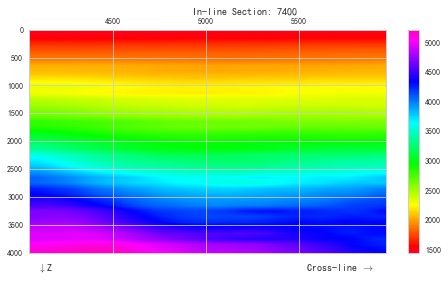

In [4]:
fig_vel, ax_vel = plt.subplots()

im = vel_cube.plot(ppp.InlineIndex(7400), ax_vel, kind='img', cm='gist_rainbow')
fig_vel.colorbar(im)
fig_vel.set(figwidth=8)

Caculate density using Gardner equation from velocity:

In [5]:
den_cube = ppp.gardner_seis("den_from_vel", vel_cube)

View 2D section of computed density cube:

[None]

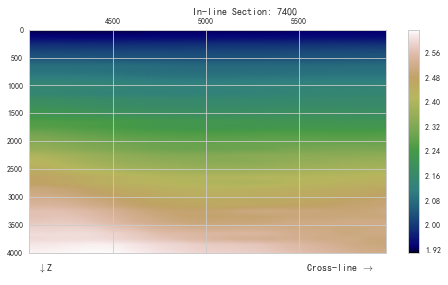

In [11]:
fig_den, ax_den = plt.subplots()

im = den_cube.plot(ppp.InlineIndex(7400), ax_den, kind='img', cm='gist_earth')
fig_den.colorbar(im)
fig_den.set(figwidth=8)

## 2. Calculation of Overburden Pressure

In [9]:
obp_cube = ppp.obp_seis("obp_new", den_cube)

View calculated OBP section:

Here use a colormap defined in OpenDtect.

[None]

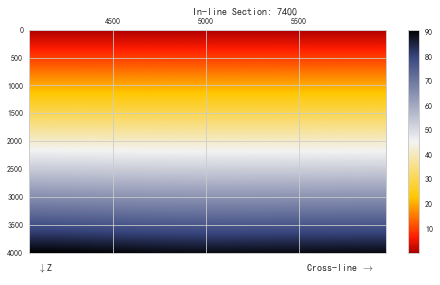

In [12]:
from pygeopressure.basic.vawt import opendtect_seismic_colormap

fig_obp, ax_obp = plt.subplots()

im = obp_cube.plot(ppp.InlineIndex(7400), ax_obp, kind='img', cm=opendtect_seismic_colormap())

fig_obp.colorbar(im)
fig_obp.set(figwidth=8)